## PCA как фильтрация шума 
PCA можно использовать в качестве метода фильтрации зашумленных данных. Идея такова: любые компоненты с дисперсией намного большей, чем влияние шума, должны быть относительно незатронуты шумом. Таким образом, если вы реконструируете данные, используя только самое большое подмножество основных компонентов, вы должны преимущественно сохранять сигнал и отбрасывать шум. Давайте посмотрим, как это выглядит с цифрами. Сначала мы построим несколько входных выборок без шума (следующий рисунок):

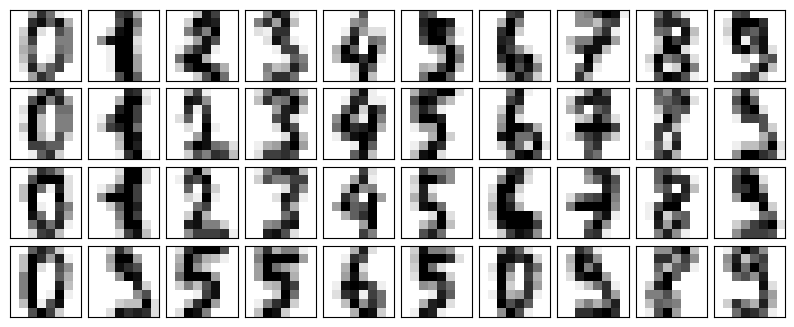

In [3]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)


Теперь давайте добавим случайный шум, чтобы создать зашумленный набор данных, и перерисуем его (следующий рисунок):

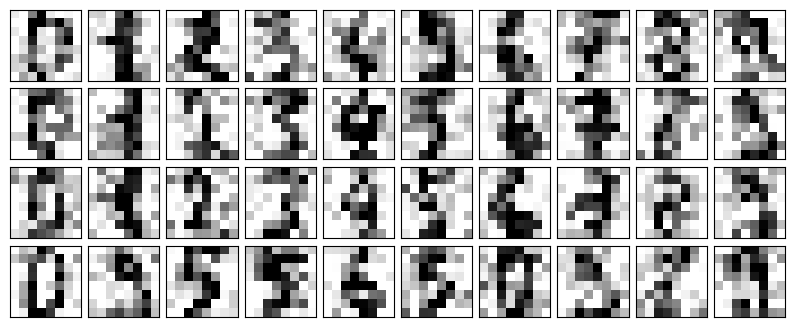

In [4]:
rng = np.random.default_rng(42)
noisy = rng.normal(digits.data, 4)
plot_digits(noisy)

Визуализация делает присутствие этого случайного шума очевидным. Давайте обучим модель PCA на зашумленных данных, требуя, чтобы проекция сохраняла 50% дисперсии:

In [5]:
from sklearn.decomposition import PCA
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Здесь 50% дисперсии приходится на 12 главных компонент из 64 исходных признаков. Теперь мы вычисляем эти компоненты, а затем используем обратное преобразование для восстановления отфильтрованных цифр; на следующем рисунке показан результат:

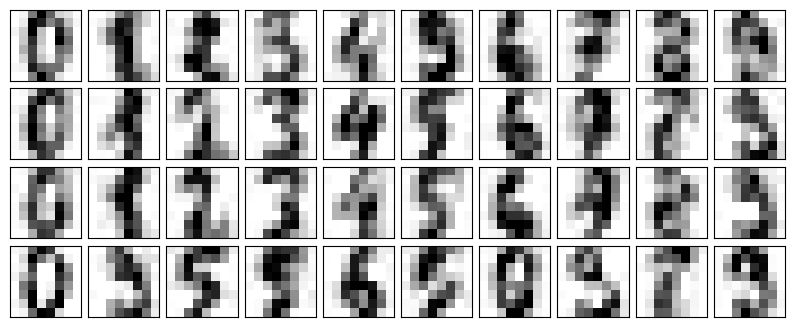

In [6]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Это свойство сохранения сигнала и шумовой фильтрации делает PCA очень полезной процедурой выбора признаков — например, вместо обучения классификатора на очень многомерных данных вы можете вместо этого обучить классификатор на представлении главного компонента более низкой размерности, которое будет автоматически служить для фильтрации случайного шума во входных данных.